In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("miles.csv")
df.head()

,date,is_weekend,miles
0,2022-01-01,False,27
1,2022-01-02,True,5
2,2022-01-03,False,36
3,2022-01-04,False,32
4,2022-01-05,False,23


In [3]:
df.shape #Print total number of records and columns

(730, 3)

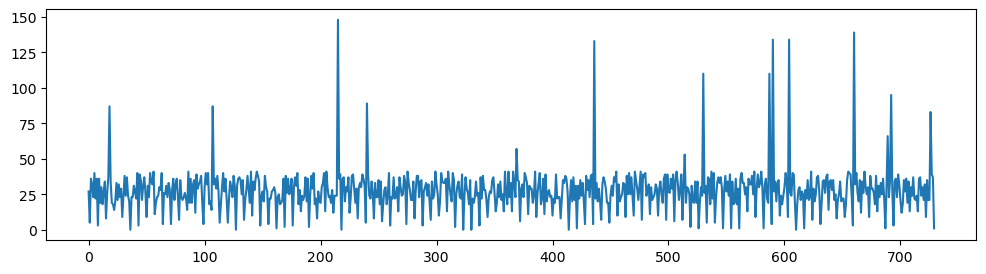

In [4]:
plt.figure(figsize=(12,3))
plt.plot(df.miles)

<Axes: xlabel='miles', ylabel='Count'>

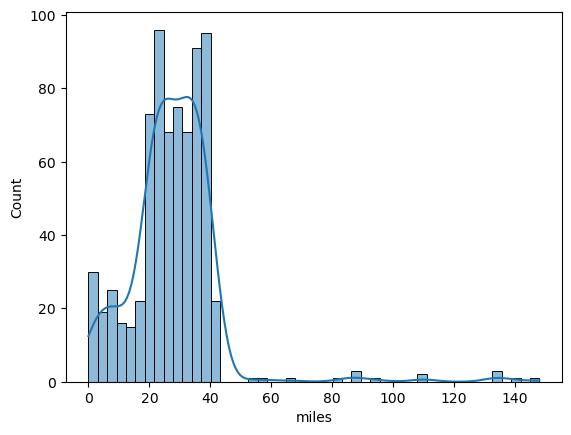

In [5]:
sns.histplot(df.miles, kde=True)

In [6]:
#As you can see it is a right skewed distribution with outliers. One option is to remove the outliers but we will keep them as it is as they represent the reality and anyways central limit theorem will take care of making the shape normal (for a sampling distribution)

In [7]:
df.miles.describe()

count    730.000000
mean      27.627397
std       15.437588
min        0.000000
25%       21.000000
50%       28.000000
75%       35.000000
max      148.000000
Name: miles, dtype: float64

In [8]:
mean_population = df.miles.mean()
std_dev_population = df.miles.std()

mean_population, std_dev_population

(27.627397260273973, 15.437588497596295)

In [9]:
SAMPLE_SIZE = 50

sample = df.sample(SAMPLE_SIZE, random_state=100)
sample.head()

,date,is_weekend,miles
184,2022-07-04,False,24
535,2023-06-20,False,36
299,2022-10-27,False,41
221,2022-08-10,False,20
152,2022-06-02,False,38


In [10]:
mean_sample = sample.miles.mean()
std_dev_sample = sample.miles.std()

mean_sample, std_dev_sample

(25.82, 8.805587280070466)

In [11]:
#Estimate the population mean with 95% confidence level. The information that you have available is standard deviation of a population and a random sample

In [12]:
import scipy.stats as st

# If you consider middle 95% portion in the standard normal curve then that leaves 2.5% on left and 2.5% on the right. If you 
# now count 95% plus 2.5% on left, it will give you 97.5% which means we need to locate 0.975 value in Z-table and find
# the corresponding Z score
z_score_95_confidence = st.norm.ppf(0.975) # 0.975 because 0.95 for the actual confidence level and on 
z_score_95_confidence

1.959963984540054

In [13]:
# for 95% confidence interval, Z value will be 1.96
margin_of_error = z_score_95_confidence*(std_dev_population/np.sqrt(SAMPLE_SIZE))
margin_of_error

4.2790025875110596

In [14]:
lower = mean_sample - margin_of_error
upper = mean_sample + margin_of_error

lower, upper

(21.54099741248894, 30.09900258751106)

In [15]:
mean_population

27.627397260273973